In [1]:
# cargamos paquetes

# Load necessary packages
library(rstan)
library(coda)
library(R2jags)
library(methods)
library(ggplot2)
# set the working directory

setwd("/home/rstudio/tarea2RegAvanz")

#--- Funciones utiles ---
prob<-function(x){
  out<-min(length(x[x>0])/length(x),length(x[x<0])/length(x))
  out
}

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.8, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)


Attaching package: ‘coda’


The following object is masked from ‘package:rstan’:

    traceplot


Loading required package: rjags

Linked to JAGS 4.3.0

Loaded modules: basemod,bugs


Attaching package: ‘R2jags’


The following object is masked from ‘package:coda’:

    traceplot


The following object is masked from ‘package:rstan’:

    traceplot




In [2]:
source("/home/rstudio/tarea2RegAvanz/claseNietor6.R")

In [3]:
#cargamos base de datos
gestacion<-read.csv("https://gente.itam.mx/lnieto/index_archivos/Gestacional.csv",header=TRUE)

In [4]:
head(gestacion)

,Anestesia,Complica,Edad,Escolaridad,Estado_civil,Forma_nac,Hospital,Ind_cesarea,Monitoreo,Mortalidad,Peso_madre,Peso_prod
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,2,1,37,4,1,1,1,2,2,1,60,2.75
2,1,2,22,3,4,2,7,6,2,1,50,2.40
3,2,1,31,1,4,1,5,1,2,1,53,3.30
4,2,2,24,2,4,1,7,5,2,1,99,3.71
5,2,2,39,4,1,1,1,5,2,1,70,3.41
6,1,2,19,1,1,2,5,6,2,1,65,3.25


In [8]:
names(gestacion)

[1] "Anestesia"    "Complica"     "Edad"         "Escolaridad"  "Estado_civil"
 [6] "Forma_nac"    "Hospital"     "Ind_cesarea"  "Monitoreo"    "Mortalidad"  
[11] "Peso_madre"   "Peso_prod"

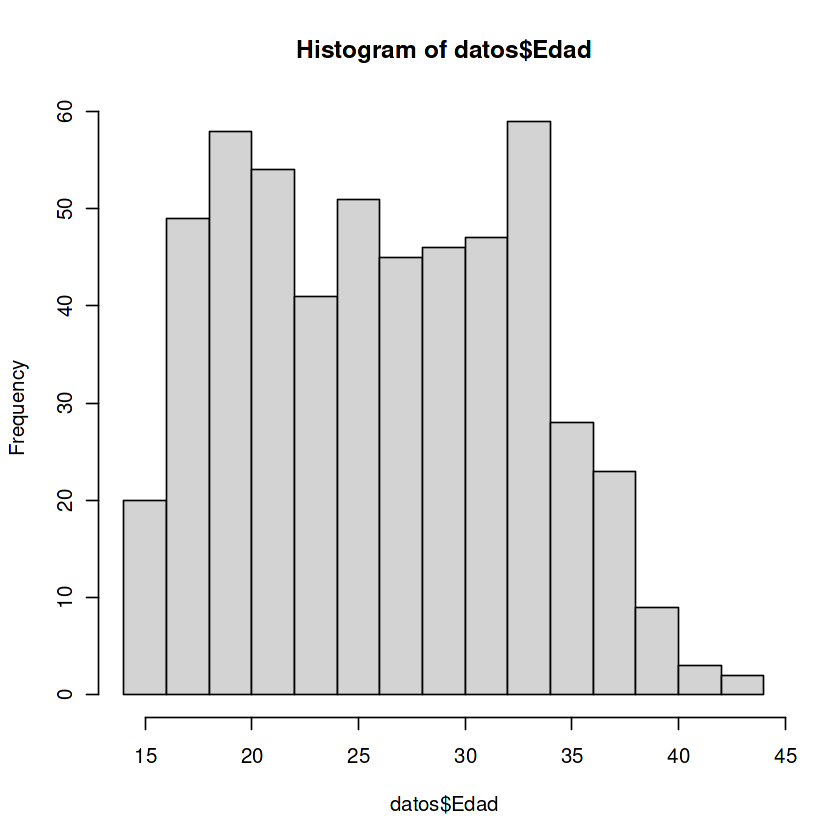

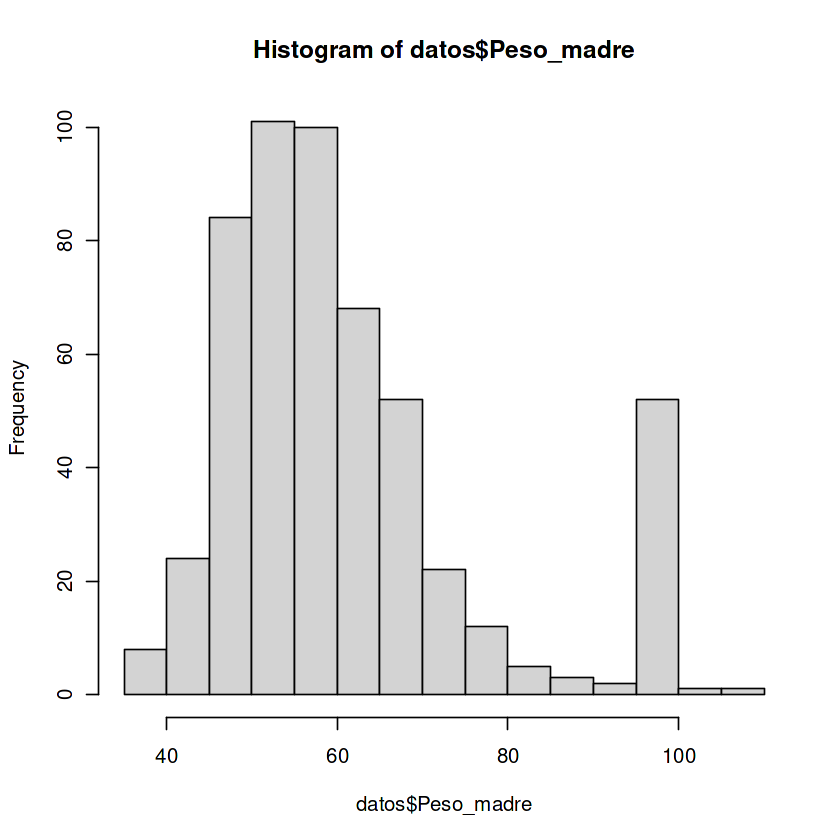

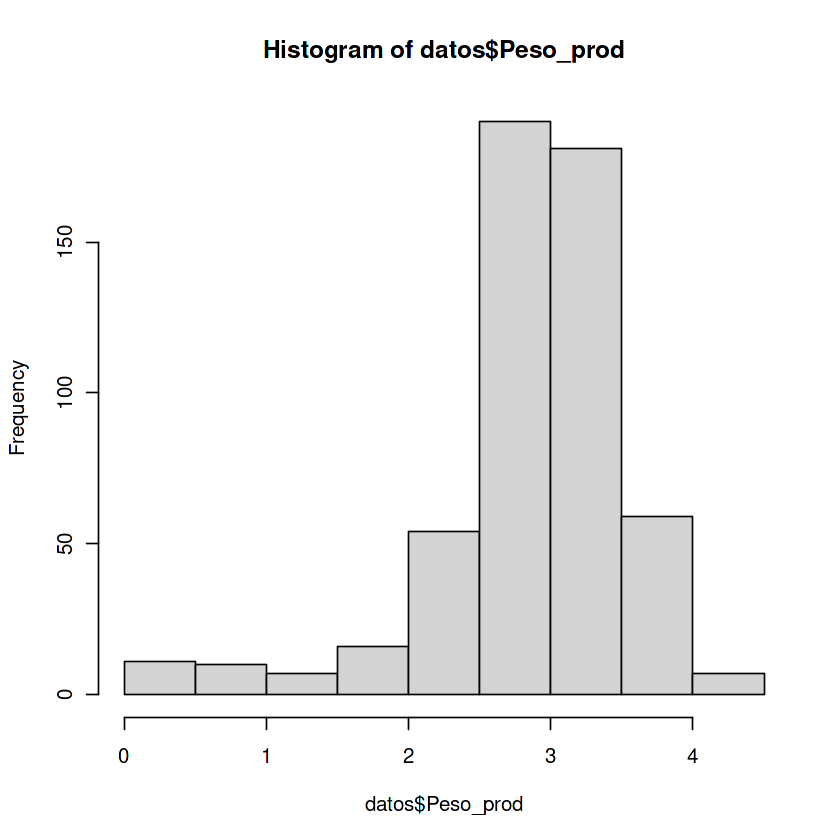

In [5]:
datos <- gestacion

# Histogramas de variables numéricas
hist(datos$Edad)
hist(datos$Peso_madre)
hist(datos$Peso_prod)

In [57]:
#Anestesia
datos2 <-gestacion
# Agrupar los datos por la variable Anestesia
df <- aggregate(Mortalidad ~ Anestesia, data = datos2, FUN = function(x) {
  mean(x == 2) * 100
})

# Crear el gráfico de barras
plot1 <-ggplot(df, aes(x = factor(Anestesia), y = Mortalidad)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Porcentaje de Mortalidad", y = "% Mortalidad")


In [58]:

#Complica

# Agrupar los datos por la variable Anestesia
df <- aggregate(Mortalidad ~ Complica, data = datos2, FUN = function(x) {
  mean(x == 2) * 100
})

# Crear el gráfico de barras
plot2<-ggplot(df, aes(x = factor(Complica), y = Mortalidad)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Porcentaje de Mortalidad ", y = "% Mortalidad")

In [59]:
# Monitoreo

# Agrupar los datos por la variable Anestesia
df <- aggregate(Mortalidad ~ Monitoreo, data = datos2, FUN = function(x) {
  mean(x == 2) * 100
})

# Crear el gráfico de barras
plot3<-ggplot(df, aes(x = factor(Monitoreo), y = Mortalidad)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Porcentaje de Mortalidad ", y = "% Mortalidad")

In [60]:
# Forma de nacimiento

# Agrupar los datos por la variable Anestesia
df <- aggregate(Mortalidad ~ Forma_nac, data = datos2, FUN = function(x) {
  mean(x == 2) * 100
})

# Crear el gráfico de barras
plot4<-ggplot(df, aes(x = factor(Forma_nac), y = Mortalidad)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Porcentaje de Mortalidad", y = "% Mortalidad")

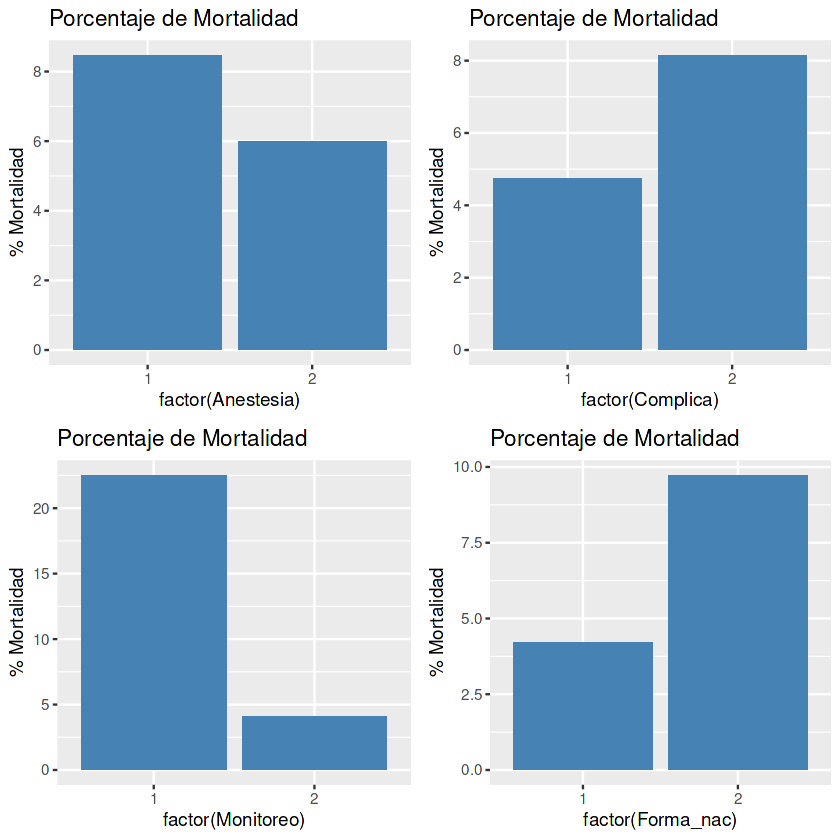

In [61]:
library(gridExtra)

# Organizar las cuatro gráficas en una figura de 2x2
grid.arrange(plot1, plot2, plot3, plot4, ncol = 2)



In [63]:
# Escolaridad

# Agrupar los datos por la variable Anestesia
df <- aggregate(Mortalidad ~ Escolaridad, data = datos2, FUN = function(x) {
  mean(x == 2) * 100
})

# Crear el gráfico de barras
plot1<-ggplot(df, aes(x = factor(Escolaridad), y = Mortalidad)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Porcentaje de Mortalidad", y = "% Mortalidad")

In [65]:
# Estado civil

# Agrupar los datos por la variable Anestesia
df <- aggregate(Mortalidad ~ Estado_civil, data = datos2, FUN = function(x) {
  mean(x == 2) * 100
})

# Crear el gráfico de barras
plot2<-ggplot(df, aes(x = factor(Estado_civil), y = Mortalidad)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Porcentaje de Mortalidad", y = "% Mortalidad")

In [66]:
# Hospital

# Agrupar los datos por la variable Anestesia
df <- aggregate(Mortalidad ~ Hospital, data = datos2, FUN = function(x) {
  mean(x == 2) * 100
})

# Crear el gráfico de barras
plot3<-ggplot(df, aes(x = factor(Hospital), y = Mortalidad)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Porcentaje de Mortalidad", y = "% Mortalidad")

In [67]:
# Ind de cesárea

# Agrupar los datos por la variable Anestesia
df <- aggregate(Mortalidad ~ Ind_cesarea, data = datos2, FUN = function(x) {
  mean(x == 2) * 100
})

# Crear el gráfico de barras
plot4<-ggplot(df, aes(x = factor(Ind_cesarea), y = Mortalidad)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Porcentaje de Mortalidad", y = "% Mortalidad")

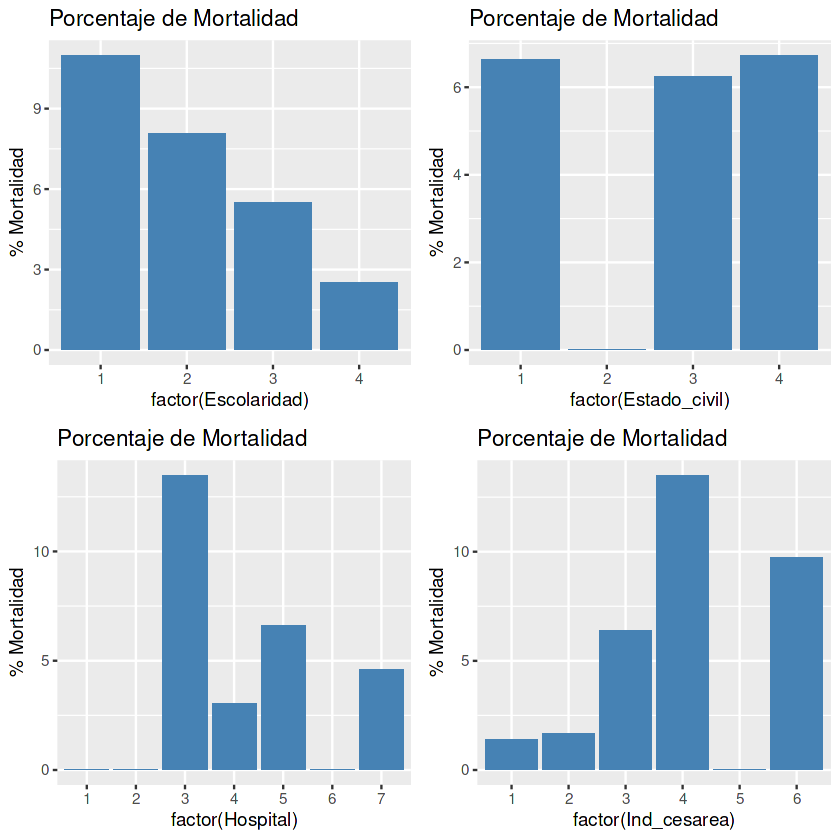

In [68]:
# Organizar las cuatro gráficas en una figura de 2x2
grid.arrange(plot1, plot2, plot3, plot4, ncol = 2)

In [25]:
# Cargamos parámetros
Anestesia <- datos$Anestesia
Complica <- datos$Complica
Edad <- datos$Edad
Escolaridad <- datos$Escolaridad
Estado_civil <- datos$Estado_civil
Forma_Nac <- datos$Forma_nac
TipoHosp <- datos$Hospital
Ind_cesarea <- datos$Ind_cesarea
Monitoreo <- datos$Monitoreo
Mortalidad <- datos$Mortalidad
Peso_madre <- datos$Peso_madre
Peso_prod <- datos$Peso_prod
# Tamaño de la muestra 
n <- length(datos$Anestesia)

# Definimos los datos iniciales 
data<-list("n"=n,"Mortalidad"=Mortalidad,"Anestesia"=Anestesia,"Complica"=Complica,
           "Edad"=Edad,"Escolaridad"=Escolaridad,"Estado_civil"=Estado_civil,"Forma_nac"=Forma_Nac, 
           "TipoHosp"=TipoHosp, "Ind_cesarea"= Ind_cesarea, "Monitoreo"= Monitoreo, "Peso_madre"=Peso_madre, 
           "Peso_prod"= Peso_prod
)

# Parámetros por monitorear 
params <- c("alpha.est", "alfa1", "alfa3", "alfa10", "alfa11", 
            "alfa1.est", "alfa2.est", "alfa6.est", "alfa7.est", "alfa9.est",
            "alfa4.est", "alfa5.est", "alfa8.est")

# Parámetros iniciales
inits <- function(){
  list(
    alfa0 = 0 , 
    alfa3 = 0 , 
    alfa10 = 0 ,
    alfa11 = 0 ,
    alfa1 = rep(0, 2), 
    alfa2 = rep(0, 2),
    alfa6 = rep(0, 2),
    alfa7 = rep(0, 7),
    alfa9 = rep(0, 2),
    alfa4 = rep(0, 4),
    alfa5 = rep(0, 4),
    alfa8 = rep(0, 6)
  )
}



# Modelo Logit

In [88]:
modelCode1 <- 'model
{
	#Likelihood
	for (i in 1:n) {
		Mortalidad[i] ~ dbern(mu[i])
    # Modelo de regresión con liga logística
    logit(mu[i]) <- alfa0 + alfa1[Anestesia[i]] + alfa2[Complica[i]] + alfa3*Edad[i] + 
		alfa4[Escolaridad[i]] + alfa5[Estado_civil[i]] + alfa6[Forma_nac[i]] + 
		alfa7[TipoHosp[i]] + alfa8[Ind_cesarea[i]] + alfa9[Monitoreo[i]] + 
		alfa10*Peso_madre[i] + alfa11*Peso_prod[i]
        
    # Modelo de regresión con liga probit 
    #mu[i] <- phi(alfa0 + alfa1[Anestesia[i]] + alfa2[Complica[i]] + alfa3*Edad[i] + 
		#alfa4[Escolaridad[i]] + alfa5[Estado_civil[i]] + alfa6[Forma_nac[i]] + 
		#alfa7[TipoHosp[i]] + alfa8[Ind_cesarea[i]] + alfa9[Monitoreo[i]] + 
		#alfa10*Peso_madre[i] + alfa11*Peso_prod[i]) 
        
    # Modelo de regresión con liga log-log 
    #eta[i] <- alfa0 + alfa1[Anestesia[i]] + alfa2[Complica[i]] + alfa3*Edad[i] + 
		#alfa4[Escolaridad[i]] + alfa5[Estado_civil[i]] + alfa6[Forma_nac[i]] + 
		#alfa7[TipoHosp[i]] + alfa8[Ind_cesarea[i]] + alfa9[Monitoreo[i]] + 
		#alfa10*Peso_madre[i] + alfa11*Peso_prod[i]
    #mu[i] <- exp(-exp(eta[i]))

    # Modelo de regresión con liga c-log-log 
    #cloglog(mu[i]) <- alfa0 + alfa1[Anestesia[i]] + alfa2[Complica[i]] + alfa3*Edad[i] + 
	#	alfa4[Escolaridad[i]] + alfa5[Estado_civil[i]] + alfa6[Forma_nac[i]] + 
	#	alfa7[TipoHosp[i]] + alfa8[Ind_cesarea[i]] + alfa9[Monitoreo[i]] + 
	#	alfa10*Peso_madre[i] + alfa11*Peso_prod[i]
        
	}
	#Priors
	alfa0 ~ dnorm(0,0.001)
	alfa3 ~ dnorm(0,0.001)
	alfa10 ~ dnorm(0,0.001)
	alfa11 ~ dnorm(0,0.001)
	# Priors de las variables categóricas que son binarias 
	for (i in 1:2){
		alfa1[i] ~ dnorm(0,100)
		alfa2[i] ~ dnorm(0,100)
		alfa6[i] ~ dnorm(0,100)
		alfa9[i] ~ dnorm(0,100)
	}
	# Priors de las variables categóricas que de varias categorías 
	for (i in 1:4){
		alfa4[i] ~ dnorm(0,100)
		alfa5[i] ~ dnorm(0,100)
	}
	for (i in 1:6){
		alfa8[i] ~ dnorm(0,100)
	}
	for (i in 1:7){
		alfa7[i] ~ dnorm(0,100)
	}
	# Vamos a establecer el constraint: 
	# alfa0 + alfa1 + alfa2 + alfa4 + alfa5 + alfa6 + 
  # alfa7 + alfa8 + alfa9 = 0 
	alpha.est <- alfa0 +mean(alfa1[])+mean(alfa2[])+
				mean(alfa4[]) + mean(alfa5[]) + 
				mean(alfa6[])+mean(alfa7[])+
				mean(alfa8[]) + mean(alfa9[])
  for (i in 1:2){
		alfa1.est[i] <- alfa1[i] - mean(alfa1[])
		alfa2.est[i] <- alfa2[i] - mean(alfa2[])
		alfa6.est[i] <- alfa6[i] - mean(alfa6[])
		alfa9.est[i] <- alfa9[i] - mean(alfa9[])
	}
  for(i in 1:4){
    alfa4.est[i] <- alfa4[i] - mean(alfa4[])
    alfa5.est[i] <- alfa5[i] - mean(alfa5[])
  }
  for(i in 1:6){
    alfa8.est[i] <- alfa8[i] - mean(alfa8[])
  }
    for(i in 1:7){
    alfa7.est[i] <- alfa7[i] - mean(alfa7[])
  }
}'

ej1.sim <- jagsModel$new(data, inits, params, modelCode1,n.thin=2, n.iter=10000, n.burnin=1000)

ej1.sim$runJagsModel()

## Checamos convergencia

In [90]:

ej1.sim$graphConvergence(parama=2)

ej1.sim$summaryModel()

ej1.sim$dicModelfunc()

Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”


ERROR: Error in plot.window(...): need finite 'xlim' values


# Modelo Probit

In [32]:
modelCode2 <- 'model
{
	#Likelihood
	for (i in 1:n) {
		Mortalidad[i] ~ dbern(mu[i])

        
    # Modelo de regresión con liga probit 
    mu[i] <- phi(alfa0 + alfa1[Anestesia[i]] + alfa2[Complica[i]] + alfa3*Edad[i] + 
		alfa4[Escolaridad[i]] + alfa5[Estado_civil[i]] + alfa6[Forma_nac[i]] + 
		alfa7[TipoHosp[i]] + alfa8[Ind_cesarea[i]] + alfa9[Monitoreo[i]] + 
		alfa10*Peso_madre[i] + alfa11*Peso_prod[i]) 
        
	}
	#Priors
	alfa0 ~ dnorm(0,0.001)
	alfa3 ~ dnorm(0,0.001)
	alfa10 ~ dnorm(0,0.001)
	alfa11 ~ dnorm(0,0.001)
	# Priors de las variables categóricas que son binarias 
	for (i in 1:2){
		alfa1[i] ~ dnorm(0,100)
		alfa2[i] ~ dnorm(0,100)
		alfa6[i] ~ dnorm(0,100)
		alfa9[i] ~ dnorm(0,100)
	}
	# Priors de las variables categóricas que de varias categorías 
	for (i in 1:4){
		alfa4[i] ~ dnorm(0,100)
		alfa5[i] ~ dnorm(0,100)
	}
	for (i in 1:6){
		alfa8[i] ~ dnorm(0,100)
	}
	for (i in 1:7){
		alfa7[i] ~ dnorm(0,100)
	}
	# Vamos a establecer el constraint: 
	# alfa0 + alfa1 + alfa2 + alfa4 + alfa5 + alfa6 + 
  # alfa7 + alfa8 + alfa9 = 0 
	alpha.est <- alfa0 +mean(alfa1[])+mean(alfa2[])+
				mean(alfa4[]) + mean(alfa5[]) + 
				mean(alfa6[])+mean(alfa7[])+
				mean(alfa8[]) + mean(alfa9[])
  for (i in 1:2){
		alfa1.est[i] <- alfa1[i] - mean(alfa1[])
		alfa2.est[i] <- alfa2[i] - mean(alfa2[])
		alfa6.est[i] <- alfa6[i] - mean(alfa6[])
		alfa9.est[i] <- alfa9[i] - mean(alfa9[])
	}
  for(i in 1:4){
    alfa4.est[i] <- alfa4[i] - mean(alfa4[])
    alfa5.est[i] <- alfa5[i] - mean(alfa5[])
  }
  for(i in 1:6){
    alfa8.est[i] <- alfa8[i] - mean(alfa8[])
  }
    for(i in 1:7){
    alfa7.est[i] <- alfa7[i] - mean(alfa7[])
  }
}'

ej2.sim <- jagsModel$new(data, inits, params, modelCode2,n.thin=2, n.iter=10000, n.burnin=1000)

ej2.sim$runJagsModel()

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 535
   Unobserved stochastic nodes: 33
   Total graph size: 7884

Initializing model



## Checamos Convergencia

                      mean          sd         2.5%           25%           50%
alfa1[1]     -1.877019e-02 0.095731665  -0.20777254  -0.081412740  -0.018695752
alfa1[2]      1.637766e-02 0.094692397  -0.16720731  -0.047407528   0.015830987
alfa1.est[1] -1.757393e-02 0.064256136  -0.14296001  -0.061225911  -0.017727131
alfa1.est[2]  1.757393e-02 0.064256136  -0.10866147  -0.026075971   0.017727131
alfa10       -9.766672e-03 0.009036745  -0.02859085  -0.015603307  -0.009396752
alfa11       -1.239132e+00 0.143521468  -1.52525599  -1.334915753  -1.236912881
alfa2.est[1] -1.348276e-02 0.061241598  -0.13461616  -0.053283760  -0.013440824
alfa2.est[2]  1.348276e-02 0.061241598  -0.10689865  -0.027653006   0.013440824
alfa3        -2.187389e-02 0.018876151  -0.05912758  -0.034631214  -0.021756993
alfa4.est[1]  7.348497e-02 0.079398730  -0.08517111   0.020745425   0.073858995
alfa4.est[2]  2.919672e-02 0.078114841  -0.12479880  -0.023476208   0.030251364
alfa4.est[3] -3.300891e-02 0.082853505  

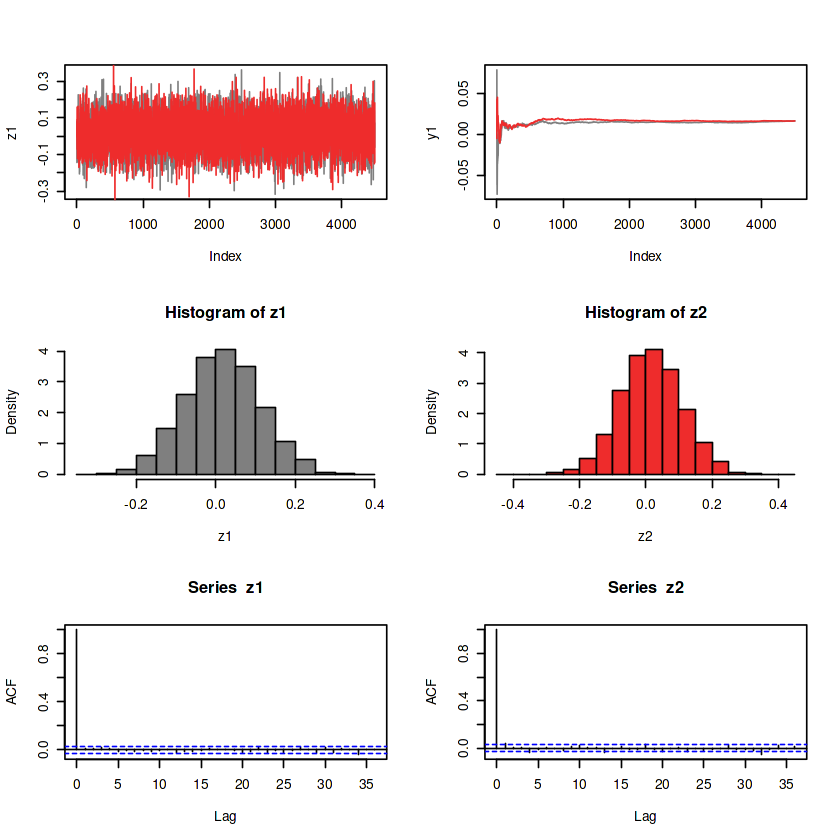

In [33]:
ej2.sim$graphConvergence(parama=2)

ej2.sim$summaryModel()

ej2.sim$dicModelfunc()

# Modelo Log-Log

In [34]:
modelCode3 <- 'model
{
	#Likelihood
	for (i in 1:n) {
		Mortalidad[i] ~ dbern(mu[i])
        
    # Modelo de regresión con liga log-log 
    eta[i] <- alfa0 + alfa1[Anestesia[i]] + alfa2[Complica[i]] + alfa3*Edad[i] + 
		alfa4[Escolaridad[i]] + alfa5[Estado_civil[i]] + alfa6[Forma_nac[i]] + 
		alfa7[TipoHosp[i]] + alfa8[Ind_cesarea[i]] + alfa9[Monitoreo[i]] + 
		alfa10*Peso_madre[i] + alfa11*Peso_prod[i]
    mu[i] <- exp(-exp(eta[i]))
        
	}
	#Priors
	alfa0 ~ dnorm(0,0.001)
	alfa3 ~ dnorm(0,0.001)
	alfa10 ~ dnorm(0,0.001)
	alfa11 ~ dnorm(0,0.001)
	# Priors de las variables categóricas que son binarias 
	for (i in 1:2){
		alfa1[i] ~ dnorm(0,100)
		alfa2[i] ~ dnorm(0,100)
		alfa6[i] ~ dnorm(0,100)
		alfa9[i] ~ dnorm(0,100)
	}
	# Priors de las variables categóricas que de varias categorías 
	for (i in 1:4){
		alfa4[i] ~ dnorm(0,100)
		alfa5[i] ~ dnorm(0,100)
	}
	for (i in 1:6){
		alfa8[i] ~ dnorm(0,100)
	}
	for (i in 1:7){
		alfa7[i] ~ dnorm(0,100)
	}
	# Vamos a establecer el constraint: 
	# alfa0 + alfa1 + alfa2 + alfa4 + alfa5 + alfa6 + 
  # alfa7 + alfa8 + alfa9 = 0 
	alpha.est <- alfa0 +mean(alfa1[])+mean(alfa2[])+
				mean(alfa4[]) + mean(alfa5[]) + 
				mean(alfa6[])+mean(alfa7[])+
				mean(alfa8[]) + mean(alfa9[])
  for (i in 1:2){
		alfa1.est[i] <- alfa1[i] - mean(alfa1[])
		alfa2.est[i] <- alfa2[i] - mean(alfa2[])
		alfa6.est[i] <- alfa6[i] - mean(alfa6[])
		alfa9.est[i] <- alfa9[i] - mean(alfa9[])
	}
  for(i in 1:4){
    alfa4.est[i] <- alfa4[i] - mean(alfa4[])
    alfa5.est[i] <- alfa5[i] - mean(alfa5[])
  }
  for(i in 1:6){
    alfa8.est[i] <- alfa8[i] - mean(alfa8[])
  }
    for(i in 1:7){
    alfa7.est[i] <- alfa7[i] - mean(alfa7[])
  }
}'

ej3.sim <- jagsModel$new(data, inits, params, modelCode3,n.thin=2, n.iter=10000, n.burnin=1000)

ej3.sim$runJagsModel()

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 535
   Unobserved stochastic nodes: 33
   Total graph size: 8954

Initializing model



## Checamos Convergencia

                      mean          sd          2.5%           25%
alfa1[1]      2.256656e-02 0.093040676  -0.162633094 -3.866046e-02
alfa1[2]     -2.085036e-02 0.095366911  -0.207930500 -8.502017e-02
alfa1.est[1]  2.170846e-02 0.061754455  -0.098323699 -2.035379e-02
alfa1.est[2] -2.170846e-02 0.061754455  -0.142174627 -6.333338e-02
alfa10        1.038160e-02 0.006823166  -0.002029062  5.587713e-03
alfa11        9.510852e-01 0.122386337   0.715025306  8.670700e-01
alfa2.est[1]  1.565712e-02 0.056148131  -0.092967266 -2.291840e-02
alfa2.est[2] -1.565712e-02 0.056148131  -0.124191481 -5.386710e-02
alfa3         1.474488e-02 0.013559296  -0.010497744  5.229167e-03
alfa4.est[1] -1.042480e-01 0.075679586  -0.254949345 -1.545114e-01
alfa4.est[2] -3.496109e-02 0.075177212  -0.182726029 -8.548829e-02
alfa4.est[3]  5.278053e-02 0.078943202  -0.101511839 -9.938119e-04
alfa4.est[4]  8.642858e-02 0.079369206  -0.069111008  3.291952e-02
alfa5.est[1] -6.553216e-02 0.075102964  -0.214827523 -1.156481

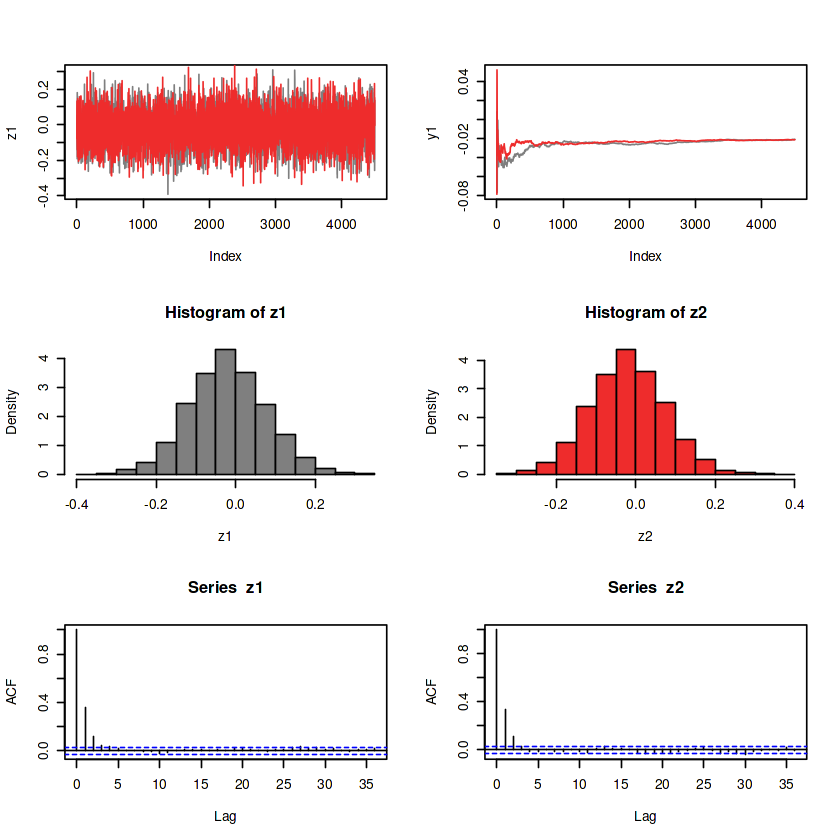

In [35]:
ej3.sim$graphConvergence(parama=2)

ej3.sim$summaryModel()

ej3.sim$dicModelfunc()

# Modelo C-Log-Log

In [40]:
modelCode4 <- 'model
{
	#Likelihood
	for (i in 1:n) {
		Mortalidad[i] ~ dbern(mu[i])

    # Modelo de regresión con liga c-log-log 
    cloglog(mu[i]) <- alfa0 + alfa1[Anestesia[i]] + alfa2[Complica[i]] + alfa3*Edad[i] + 
		alfa4[Escolaridad[i]] + alfa5[Estado_civil[i]] + alfa6[Forma_nac[i]] + 
		alfa7[TipoHosp[i]] + alfa8[Ind_cesarea[i]] + alfa9[Monitoreo[i]] + 
		alfa10*Peso_madre[i] + alfa11*Peso_prod[i]
        
	}
	#Priors
	alfa0 ~ dnorm(0,0.001)
	alfa3 ~ dnorm(0,0.001)
	alfa10 ~ dnorm(0,0.001)
	alfa11 ~ dnorm(0,0.001)
	# Priors de las variables categóricas que son binarias 
	for (i in 1:2){
		alfa1[i] ~ dnorm(0,.001)
		alfa2[i] ~ dnorm(0,.001)
		alfa6[i] ~ dnorm(0,.001)
		alfa9[i] ~ dnorm(0,.001)
	}
	# Priors de las variables categóricas que de varias categorías 
	for (i in 1:4){
		alfa4[i] ~ dnorm(0,.001)
		alfa5[i] ~ dnorm(0,.001)
	}
	for (i in 1:6){
		alfa8[i] ~ dnorm(0,.001)
	}
	for (i in 1:7){
		alfa7[i] ~ dnorm(0,.001)
	}
	# Vamos a establecer el constraint: 
	# alfa0 + alfa1 + alfa2 + alfa4 + alfa5 + alfa6 + 
  # alfa7 + alfa8 + alfa9 = 0 
	alpha.est <- alfa0 +mean(alfa1[])+mean(alfa2[])+
				mean(alfa4[]) + mean(alfa5[]) + 
				mean(alfa6[])+mean(alfa7[])+
				mean(alfa8[]) + mean(alfa9[])
  for (i in 1:2){
		alfa1.est[i] <- alfa1[i] - mean(alfa1[])
		alfa2.est[i] <- alfa2[i] - mean(alfa2[])
		alfa6.est[i] <- alfa6[i] - mean(alfa6[])
		alfa9.est[i] <- alfa9[i] - mean(alfa9[])
	}
  for(i in 1:4){
    alfa4.est[i] <- alfa4[i] - mean(alfa4[])
    alfa5.est[i] <- alfa5[i] - mean(alfa5[])
  }
  for(i in 1:6){
    alfa8.est[i] <- alfa8[i] - mean(alfa8[])
  }
    for(i in 1:7){
    alfa7.est[i] <- alfa7[i] - mean(alfa7[])
  }
}'

ej4.sim <- jagsModel$new(data, inits, params, modelCode4,n.thin=2, n.iter=10000, n.burnin=1000)

ej4.sim$runJagsModel()

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 535
   Unobserved stochastic nodes: 33
   Total graph size: 7884

Initializing model



## Checamos Convergencia

                      mean         sd         2.5%          25%           50%
alfa1[1]     -1.120323e-02 0.09801005  -0.20201669  -0.07675543 -1.105552e-02
alfa1[2]      1.083997e-02 0.09668494  -0.17736386  -0.05451408  9.877727e-03
alfa1.est[1] -1.102160e-02 0.06749168  -0.14413282  -0.05741150 -1.063880e-02
alfa1.est[2]  1.102160e-02 0.06749168  -0.11812733  -0.03544697  1.063880e-02
alfa10       -1.049336e-02 0.01537639  -0.04314406  -0.02027739 -9.930498e-03
alfa11       -1.965219e+00 0.19542940  -2.36812134  -2.09130309 -1.960853e+00
alfa2.est[1] -5.707460e-03 0.06676915  -0.13403229  -0.05220923 -6.446100e-03
alfa2.est[2]  5.707460e-03 0.06676915  -0.12560101  -0.03912842  6.446100e-03
alfa3        -4.557318e-02 0.02870323  -0.10200920  -0.06495877 -4.518620e-02
alfa4.est[1]  4.292235e-02 0.08456684  -0.12281276  -0.01335428  4.400106e-02
alfa4.est[2]  1.315070e-02 0.08405637  -0.14792438  -0.04446423  1.334270e-02
alfa4.est[3] -1.018594e-02 0.08529185  -0.17444701  -0.06862161 

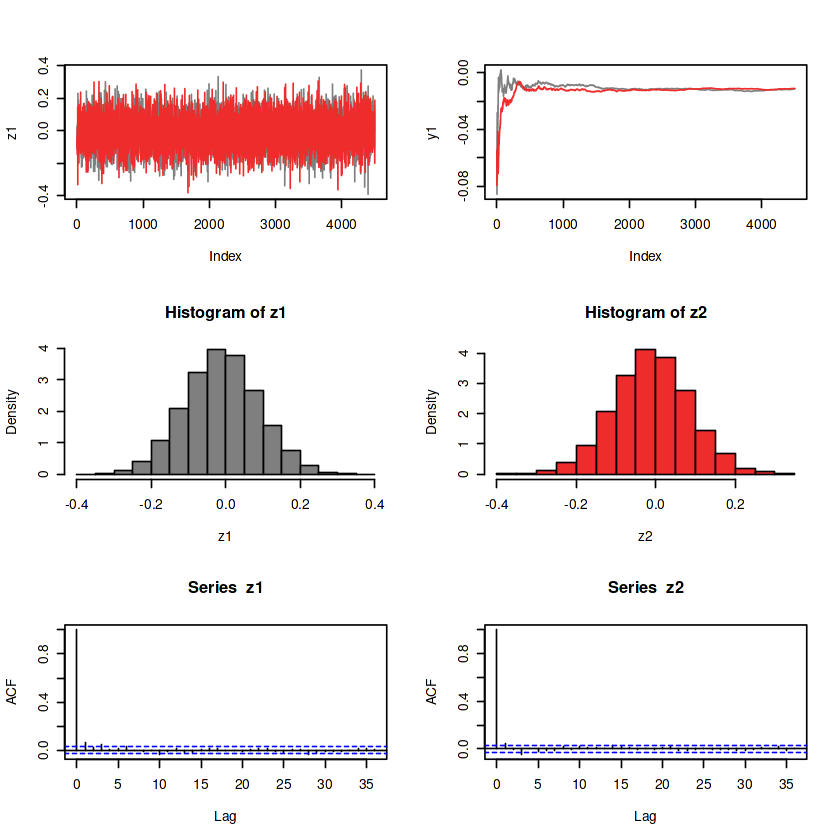

In [41]:
ej4.sim$graphConvergence(parama=1)

ej4.sim$summaryModel()

ej4.sim$dicModelfunc()

# Modelo final

In [69]:
ej5.sim <- jagsModel$new(data, inits, params, modelCode1,n.thin=4, n.iter=50000, n.burnin=5000)

ej5.sim$runJagsModel()

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 535
   Unobserved stochastic nodes: 33
   Total graph size: 7884

Initializing model



                  mean          sd        2.5%          25%          50%
alfa1[1]   -1.98055312 21.15970526 -42.7502082 -16.51948543  -2.15775025
alfa1[2]   -1.12724758 21.16898431 -41.6843036 -15.58781620  -1.28856703
alfa10     -0.02050012  0.02450405  -0.0698898  -0.03681512  -0.01993714
alfa11     -3.43295314  0.55958391  -4.5924999  -3.79281550  -3.40357842
alfa2[1]   -1.74173024 20.81700365 -42.4824450 -15.89968231  -1.61042406
alfa2[2]   -1.79086009 20.81719646 -42.4038100 -15.95869564  -1.66059854
alfa3      -0.04757161  0.05950154  -0.1731805  -0.08578143  -0.04452790
alfa4[1]    0.55999200 15.06983426 -28.6516097  -9.74158396   0.57105033
alfa4[2]   -1.02695532 15.07093193 -30.0749821 -11.36662044  -1.05096005
alfa4[3]   -2.21196815 15.08386026 -31.5143500 -12.44048027  -2.23472108
alfa4[4]    0.01338521 15.07926847 -29.0542023 -10.25034960   0.08574209
alfa5[1]    6.13756330 15.84998837 -24.8173767  -4.55515993   6.18720920
alfa5[2]  -18.13852708 20.04857288 -58.3558377 -31.

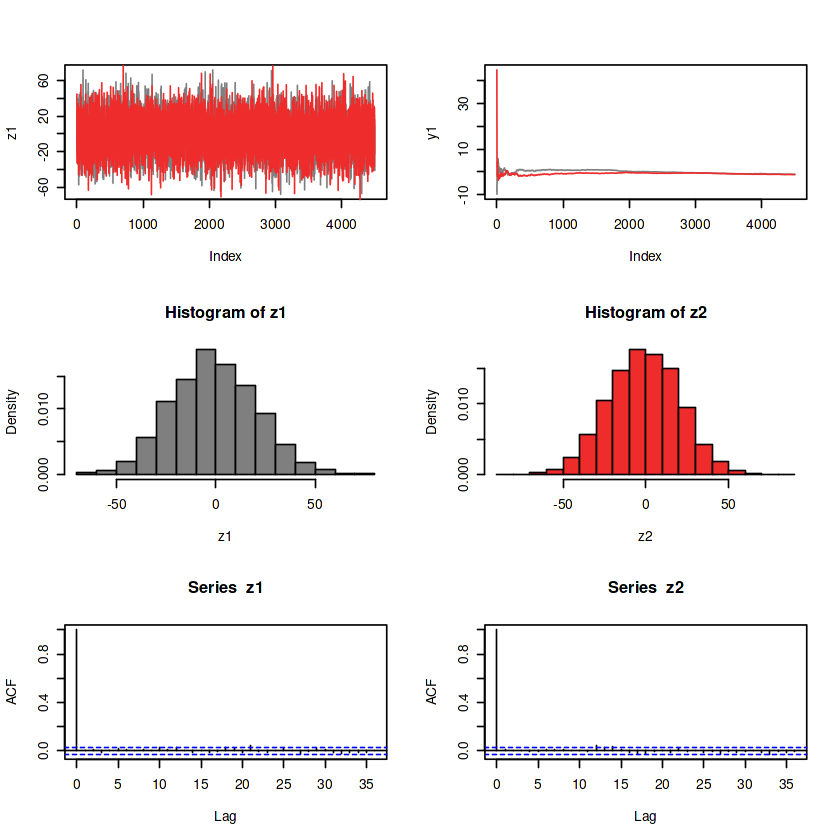

In [91]:
ej5.sim$graphConvergence(parama=2)

ej5.sim$summaryModel()

ej5.sim$dicModelfunc()

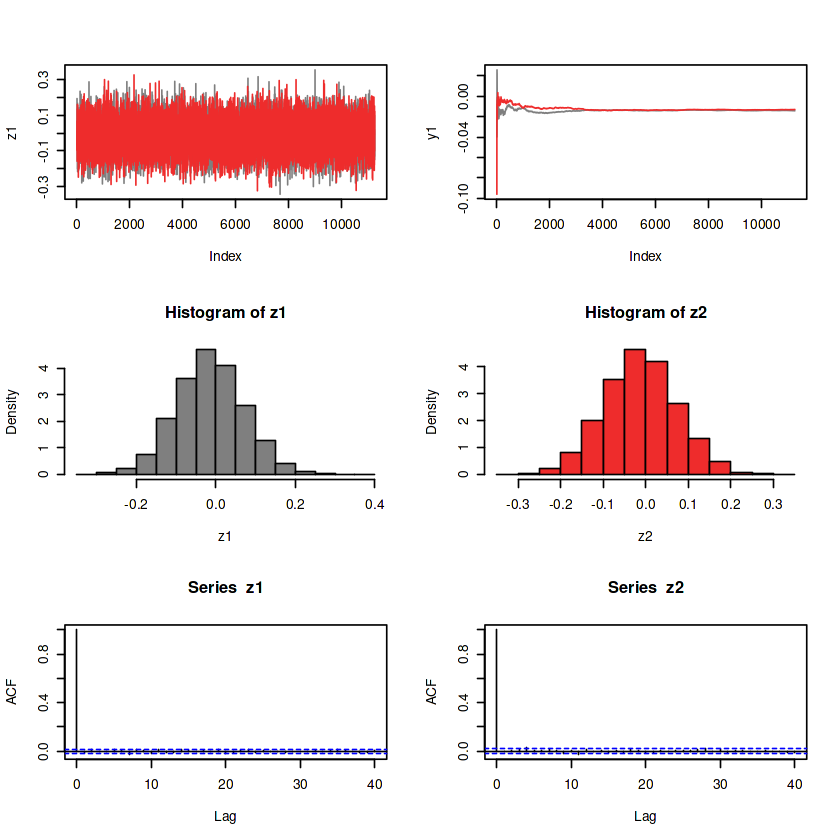

In [84]:
ej5.sim$graphConvergence(parama=12)

In [87]:

# Carga la biblioteca xtable
library(xtable)
# Convierte el resultado en una tabla en formato LaTeX
summary_latex <- xtable(ej5.sim$summaryModel())
# Imprime la tabla en formato LaTeX
print(summary_latex, type = "latex")

                   mean         sd         2.5%          25%           50%
alfa1[1]   -0.010571645 0.09871775  -0.20550031  -0.07684074 -1.095132e-02
alfa1[2]    0.011290915 0.09943905  -0.18235847  -0.05668918  1.081639e-02
alfa10     -0.013660168 0.01857417  -0.05203672  -0.02556130 -1.300699e-02
alfa11     -2.506688167 0.30013632  -3.11726764  -2.70368906 -2.496129e+00
alfa2[1]   -0.007659277 0.09971154  -0.20321628  -0.07459668 -7.851426e-03
alfa2[2]    0.006367478 0.09859963  -0.18855001  -0.05972730  6.227988e-03
alfa3      -0.047652153 0.03944324  -0.12863240  -0.07362137 -4.677645e-02
alfa4[1]    0.031130775 0.09980473  -0.16617688  -0.03555247  3.197495e-02
alfa4[2]    0.020478997 0.09866600  -0.17169091  -0.04757969  2.129884e-02
alfa4[3]   -0.009960676 0.09835719  -0.19982770  -0.07498133 -1.150894e-02
alfa4[4]   -0.035351637 0.09917193  -0.22972974  -0.10227354 -3.616332e-02
alfa5[1]    0.024596186 0.09852891  -0.17166198  -0.04215981  2.564741e-02
alfa5[2]   -0.001551299 0

In [89]:
# Parámetros por monitorear 
params2 <- c("alpha.est", "alfa1", "alfa3", "alfa10", "alfa11", 
            "alfa1", "alfa2", "alfa6", "alfa7", "alfa9",
            "alfa4", "alfa5", "alfa8")
ej5.sim <- jagsModel$new(data, inits, params2, modelCode1,n.thin=2, n.iter=10000, n.burnin=1000)

ej5.sim$runJagsModel()